Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lectura del archivo y aproximaciones al dataset

In [3]:
#Lectura de dataset y convesión a dataframe.
df_orig = pd.read_csv('heart_attack_prediction_indonesia.csv')
print(df_orig)

        age  gender region income_level  hypertension  diabetes  \
0        60    Male  Rural       Middle             0         1   
1        53  Female  Urban          Low             0         0   
2        62  Female  Urban          Low             0         0   
3        73    Male  Urban          Low             1         0   
4        52    Male  Urban       Middle             1         0   
...     ...     ...    ...          ...           ...       ...   
158350   60  Female  Rural       Middle             0         0   
158351   64  Female  Urban          Low             0         0   
158352   30    Male  Urban       Middle             0         0   
158353   74    Male  Urban       Middle             0         0   
158354   61    Male  Urban       Middle             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
0                     211        0                   83               0  ...   
1                     208        0 

El dataset cuenta con 28 variables que brindan una gran diversidad y 158.355 registros, que brindan solidez al análisis.

Cabe destacar que se trabajara con una copia del original, por lo que en caso de que resulte pertinente se podra acceder al primer dataset sin complicaciones

In [4]:
#Creación de la copia del df original.
df= df_orig.copy(deep=True)

In [5]:
print(df.columns)

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')


Con esta primera aproximación podemos los tipos de variables con las que se cuenta y observar que algunos campos categoricos estan codificados con 0 1.

In [6]:
#Con esto podemos tener una pequeña aproximación estadística al dataset
print(df.describe())

                 age   hypertension       diabetes  cholesterol_level  \
count  158355.000000  158355.000000  158355.000000      158355.000000   
mean       54.543778       0.299069       0.199804         199.533264   
std        11.910897       0.457851       0.399854          39.737565   
min        25.000000       0.000000       0.000000         100.000000   
25%        46.000000       0.000000       0.000000         172.000000   
50%        55.000000       0.000000       0.000000         199.000000   
75%        63.000000       1.000000       0.000000         226.000000   
max        90.000000       1.000000       1.000000         350.000000   

             obesity  waist_circumference  family_history    sleep_hours  \
count  158355.000000        158355.000000   158355.000000  158355.000000   
mean        0.249901            93.268504        0.300218       6.480064   
std         0.432957            16.382205        0.458354       1.425398   
min         0.000000            20.000

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

Se observa una de las variables cuanta con una cantidad muy alta de datos nulos. El resto de las variables parecen no contar con este problema y tampoco con datos nulos que esten escondidos en valores como 0 un problema que suele aparacer en algunos datasets.

Se comienza el preprocesamiento de datos para mejorar la comprensión sobre las variables y la reducción sobre las mismas

In [8]:
print(df.isnull().sum())

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [9]:
94848/158355*100

59.89580373212087

In [10]:
print(df['alcohol_consumption'])

0              NaN
1              NaN
2         Moderate
3         Moderate
4         Moderate
            ...   
158350         NaN
158351         NaN
158352    Moderate
158353         NaN
158354         NaN
Name: alcohol_consumption, Length: 158355, dtype: object


Se eliminaran las siguientes variables: alcohol_consumption, heart_attack y waist_circumference.  
1. Alcohol_consumption es practicamente inutilizable, debido al altisimo porcentaje de datos nulos(60%).
2. Heart_attack debido a que se desconoce como se realizo la la predicción, para evitar que esta variable sesgue de forma abrupta el análisis.
3. Waist_circumference no se considera una variable que pueda brindar valor al análisis. Sobre todo teniendo en cuenta otras que brindan información similar como obesidad, o nivel de triglicéridos.

In [11]:
print(df.columns)

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')


In [12]:
df.drop(['alcohol_consumption', 'heart_attack', 'waist_circumference'], axis=1, inplace=True)

Se traducen el nombre las variables y sus valores para una mejor comprensión de las mismas.

In [13]:
#Se utiliza un diccionario para definir los nuevos nombres de las columnas y se le asigna a la variable nuevos_nombres. Luego se usa esta variable para renombrar las colummnas.
nuevos_nombres = {
    'age': 'edad',
    'gender': 'género',
    'region': 'región',
    'income_level': 'nivel_ingresos',
    'hypertension': 'hipertensión',
    'diabetes': 'diabetes',
    'cholesterol_level': 'nivel_colesterol',
    'obesity': 'obesidad',
    'family_history': 'antecedentes_familiares',
    'smoking_status': 'estado_tabaquismo',
    'physical_activity': 'actividad_física',
    'dietary_habits': 'hábitos_alimenticios',
    'air_pollution_exposure': 'exposición_contaminación_aire',
    'stress_level': 'nivel_estrés',
    'sleep_hours': 'horas_sueño',
    'blood_pressure_systolic': 'presión_sistólica',
    'blood_pressure_diastolic': 'presión_diastólica',
    'fasting_blood_sugar': 'glucosa_ayuno',
    'cholesterol_hdl': 'colesterol_bueno',
    'cholesterol_ldl': 'colesterol_malo',
    'triglycerides': 'triglicéridos',
    'EKG_results': 'electrocardiograma',
    'previous_heart_disease': 'enfermedad_cardíaca',
    'medication_usage': 'uso_medicación',
    'participated_in_free_screening': 'asistió_chequeo_gratuito',
}

# Aplicar el cambio en Pandas
df.rename(columns=nuevos_nombres, inplace=True)

Para el renombramiento de los valores de algunas variables se utiliza diccionario de mapeo.

In [14]:
df['género'] = df['género'].map({'Female':'Femenino','Male':'Masculino'})

In [15]:
df['región'] = df['región'].map({'Urban':'Urbana','Rural':'Rural'}) 

In [16]:
df['nivel_ingresos']= df['nivel_ingresos'].map({'Low':'Bajo','Middle':'Medio','High':'Alto'})

In [17]:
df['estado_tabaquismo']=df['estado_tabaquismo'].map({'Never':'Nunca','Current':'Fumador','Past':'Exfumador'})

In [18]:
df.actividad_física.value_counts()

actividad_física
Low         63417
Moderate    63027
High        31911
Name: count, dtype: int64

In [19]:
df['actividad_física']=df['actividad_física'].map({'Low':'Baja','Moderate':'Moderada','High':'Alta'})

In [20]:
df.hábitos_alimenticios.value_counts()

hábitos_alimenticios
Unhealthy    95030
Healthy      63325
Name: count, dtype: int64

In [21]:
df['hábitos_alimenticios']=df['hábitos_alimenticios'].map({'Unhealthy':'Poco saludables','Healthy':'Saludables'})

In [22]:
df.exposición_contaminación_aire.value_counts()

exposición_contaminación_aire
Moderate    79144
Low         47355
High        31856
Name: count, dtype: int64

In [23]:
df['exposición_contaminación_aire']=df['exposición_contaminación_aire'].map({'Low':'Baja','Moderate':'Moderada','High':'Alta'})

In [24]:
df.electrocardiograma.value_counts()

electrocardiograma
Normal      126914
Abnormal     31441
Name: count, dtype: int64

In [25]:
df['electrocardiograma']=df['electrocardiograma'].map({'Normal':'Normal','Abnormal':'Anormal'})

In [26]:
df.nivel_estrés.value_counts()

nivel_estrés
Moderate    79366
High        47359
Low         31630
Name: count, dtype: int64

In [27]:
df['nivel_estrés']=df['nivel_estrés'].map({'Low':'Bajo','Moderate':'Moderado','High':'Alto'})

Con eso tendríamos en español todos los valores que anterriormente estaban en ingles.

El siguiente paso sería decodificar los valores 0 y 1 de las variables dummy, ya que esto facilitará el análisis exploratorio y la interpretación de los datos. Sin embargo, si este fuera un proyecto enfocado en ciencia de datos, generalmente no realizaríamos esta conversión. Debido a que las varibles dummys con formato númerico permiten mejor entrenamiento de modelos de machine learning.

In [28]:
df['hipertensión'] = df['hipertensión'].map({0:'No',1:'Sí'})

In [29]:
df['hipertensión']

0         No
1         No
2         No
3         Sí
4         Sí
          ..
158350    No
158351    No
158352    No
158353    No
158354    No
Name: hipertensión, Length: 158355, dtype: object

In [30]:
df['diabetes'] = df['diabetes'].map({0:'No',1:'Sí'})

In [31]:
df['diabetes']

0         Sí
1         No
2         No
3         No
4         No
          ..
158350    No
158351    No
158352    No
158353    No
158354    No
Name: diabetes, Length: 158355, dtype: object

In [32]:
df['antecedentes_familiares'] = df['antecedentes_familiares'].map({0:'No',1:'Sí'})

In [33]:
df['antecedentes_familiares']

0         No
1         Sí
2         Sí
3         Sí
4         No
          ..
158350    No
158351    No
158352    No
158353    Sí
158354    No
Name: antecedentes_familiares, Length: 158355, dtype: object

In [34]:
df['obesidad'] = df['obesidad'].map({0:'No',1:'Sí'})

In [35]:
df['enfermedad_cardíaca'] = df['enfermedad_cardíaca'].map({0:'No',1:'Sí'})

In [36]:
df['uso_medicación'] = df['uso_medicación'].map({0:'No',1:'Sí'})

In [37]:
df['asistió_chequeo_gratuito'] = df['asistió_chequeo_gratuito'].map({0:'No',1:'Sí'})

In [38]:
print(df)

        edad     género  región nivel_ingresos hipertensión diabetes  \
0         60  Masculino   Rural          Medio           No       Sí   
1         53   Femenino  Urbana           Bajo           No       No   
2         62   Femenino  Urbana           Bajo           No       No   
3         73  Masculino  Urbana           Bajo           Sí       No   
4         52  Masculino  Urbana          Medio           Sí       No   
...      ...        ...     ...            ...          ...      ...   
158350    60   Femenino   Rural          Medio           No       No   
158351    64   Femenino  Urbana           Bajo           No       No   
158352    30  Masculino  Urbana          Medio           No       No   
158353    74  Masculino  Urbana          Medio           No       No   
158354    61  Masculino  Urbana          Medio           No       No   

        nivel_colesterol obesidad antecedentes_familiares estado_tabaquismo  \
0                    211       No                      N

En esto momento el dataframe ya cuenta con las variables codificadas para un mejor entendimiento.

Las variables podrían clasificarse de la siguiente manera  
1. Demográficas  
Edad  
Genero  
Región  
Nivel de ingresos  
  
2. Antecedentes medicos  
Hipertensión  
Diabetes  
Nivel de colesterol  
Obesidad  
Antecedentes familiares  
Enfermedad cardíaca  
  
3. Hábitos  
Tabaquismo  
Actividad física  
Hábitos alimenticios  
Exposición a contaminación del aire  
Nivel de estrés  
asistió_chequeo_gratuito  
  
4. Parámetros Clínicos y Biométricos  
Presión sistólica  
Presión diastólica  
Glucosa en ayuno  
Colesterol bueno  
Colesterol malo  
Triglicéridos  
Electrocardiograma


Realización del análisis exploratorio de datos

Esta parte tiene la redación corregida

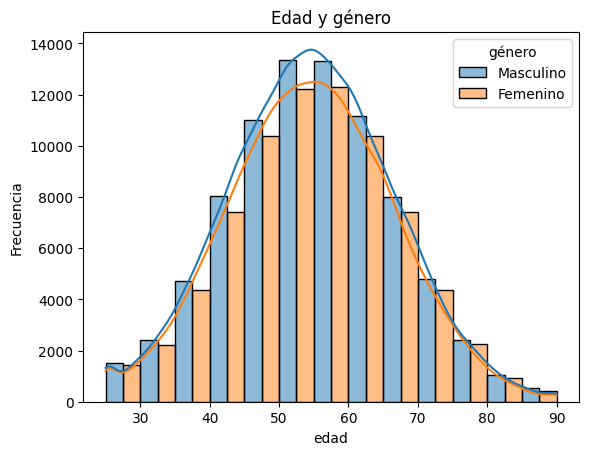

In [39]:
#Distribución de la muestra tanto por edad como por género.
sns.histplot(df,x='edad',binwidth=5 ,kde=True,hue='género', multiple='dodge')
plt.title('Edad y género')
plt.ylabel('Frecuencia')
plt.show()


Se observa que la mayoria de las personas de la muestra tienen entre 40 y 70 años.  
En todas las edades se cuenta ligeramente una predominancia de personas con género masculino que femenino.

<Axes: xlabel='edad', ylabel='colesterol_malo'>

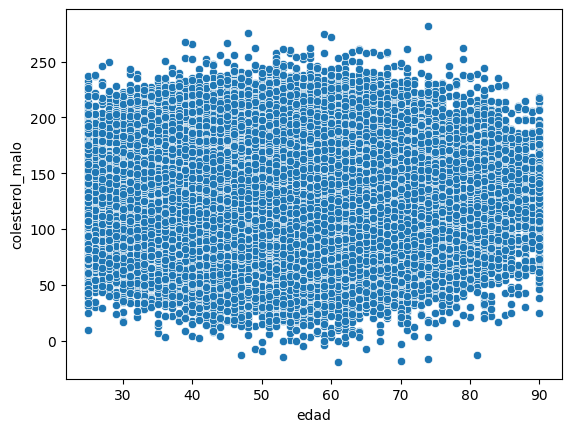

In [40]:
#sccatterplot de colesterol malo en relación con la edad
sns.scatterplot(df,x='edad',y='colesterol_malo')

Esta demostrado cientificamente que con el pasar de los años el colesterol LDL(malo) aumenta y el colesterol HDL (bueno) decrece. En este dataset esta correlación no se observa, esto podría deberse a que la muestra tomada abarca principalmente personas con affecciones cardíacas o con riesgo a padecerlas.

<Axes: xlabel='actividad_física', ylabel='colesterol_bueno'>

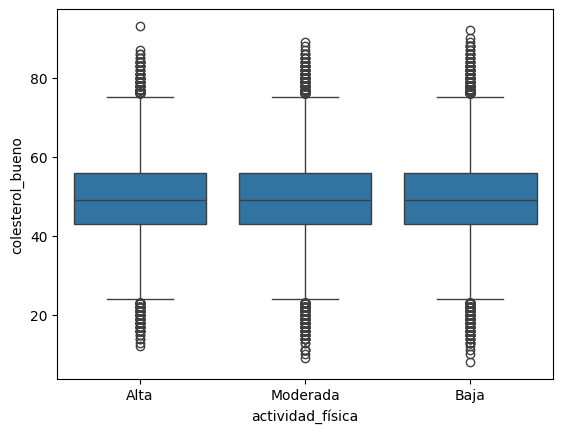

In [41]:
sns.boxplot(df,x='actividad_física',y='colesterol_bueno')

<Axes: xlabel='actividad_física', ylabel='count'>

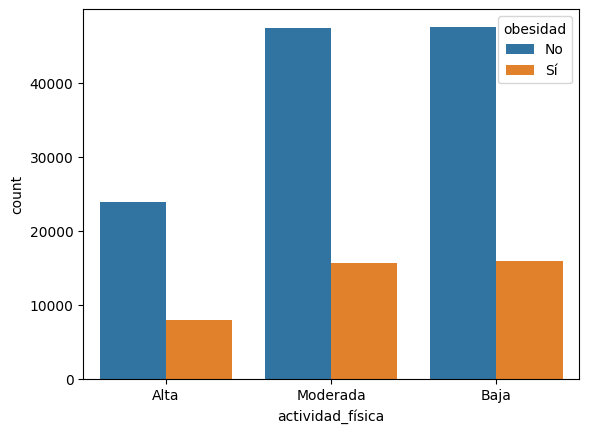

In [42]:
sns.countplot(df,x='actividad_física',hue='obesidad')